In [1]:
import pandas as pd
import numpy as np
import re
import os
from difflib import SequenceMatcher
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
info = pd.read_csv('../data/sorted_new.csv', index_col=0)
results = pd.read_csv('../data/sorted_new_goemotion_predictions.csv', index_col=0)

In [3]:
column = pd.DataFrame({'script': info['script']})

In [4]:
column = column.reset_index(drop= True)

In [5]:
final = column.join(results)

In [6]:
final

,script,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,False,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.981902
1,False,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.998637
2,False,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.953519,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,False,0.000000,0.0,0.0,0.0,0.000000,0.0,0.318040,0.405695,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.366795
4,False,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.998637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153985,False,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.998641
153986,False,0.000000,0.0,0.0,0.0,0.000000,0.0,0.528134,0.366136,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
153987,False,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.933803,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.481151
153988,False,0.905074,0.0,0.0,0.0,0.590937,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [7]:
script = final[final['script'] == True]

In [8]:
unique = final[final['script'] == False]

In [9]:
script = script.drop(columns = ['script'])
unique = unique.drop(columns = ['script'])
script = script.reset_index(drop= True)
unique= unique.reset_index(drop= True)

In [10]:
def set_frequency(row) -> int:
    if row > 0:
        return 1
    else:
        return 0

In [12]:
frequencies_script = []
for column in script.columns:
    frequencies_script.append(sum(script[column].apply(lambda x: set_frequency(x))))

In [13]:
frequencies_script

[9,
 0,
 1702,
 4,
 17,
 49,
 8,
 1051,
 0,
 0,
 10,
 0,
 0,
 0,
 1,
 8,
 0,
 5,
 0,
 0,
 6,
 0,
 27,
 1,
 3,
 17,
 3,
 465]

In [14]:
freq_dict_script = dict(zip(script.columns, frequencies_script))
sorted_freq_dict_script = dict(sorted(freq_dict_script.items(), key=lambda item: item[1]))

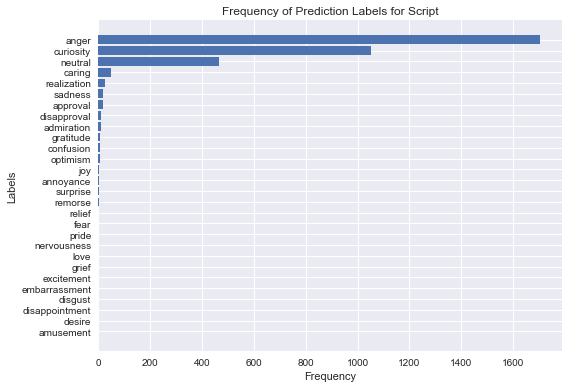

In [15]:
plt.barh(list(sorted_freq_dict_script.keys()), list(sorted_freq_dict_script.values()))
plt.title('Frequency of Prediction Labels for Script')
plt.xlabel('Frequency')
plt.ylabel('Labels')
plt.tight_layout()
plt.savefig('../graphs/script_freq_preds.jpg')

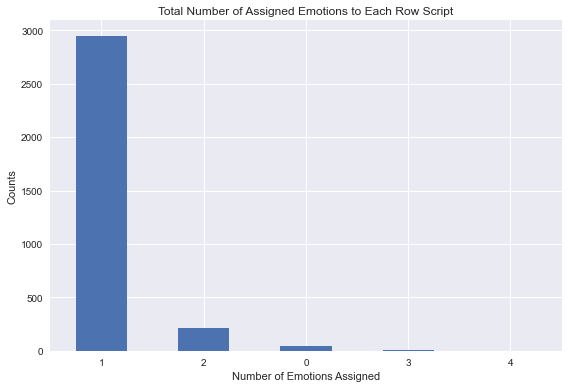

In [16]:
script.astype(bool).sum(axis=1).value_counts().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=360)
plt.title('Total Number of Assigned Emotions to Each Row Script')
plt.xlabel('Number of Emotions Assigned')
plt.ylabel('Counts')
plt.tight_layout()
plt.savefig('../graphs/script_total_preds.jpg')

In [17]:
labels = script.columns
mean_scores_script = []
for label in labels:
    mean_scores_script.append(script.loc[script[label] > 0, label].mean())

In [18]:
mean_scores_script

[0.7958246270815531,
 nan,
 0.689813336985652,
 0.6259151324629784,
 0.69093837983468,
 0.6808662663917152,
 0.5093179419636726,
 0.9484595981072971,
 nan,
 nan,
 0.5235748082399369,
 nan,
 nan,
 nan,
 0.3370172679424286,
 0.9872781187295914,
 nan,
 0.8253769874572754,
 nan,
 nan,
 0.6308270494143168,
 nan,
 0.42824457751380074,
 0.3818010091781616,
 0.7581757108370463,
 0.5276350834790398,
 0.8427027662595113,
 0.8009770882386034]

In [19]:
mean_dict_script = dict(zip(labels, mean_scores_script))
mean_dict_script

{'admiration': 0.7958246270815531,
 'amusement': nan,
 'anger': 0.689813336985652,
 'annoyance': 0.6259151324629784,
 'approval': 0.69093837983468,
 'caring': 0.6808662663917152,
 'confusion': 0.5093179419636726,
 'curiosity': 0.9484595981072971,
 'desire': nan,
 'disappointment': nan,
 'disapproval': 0.5235748082399369,
 'disgust': nan,
 'embarrassment': nan,
 'excitement': nan,
 'fear': 0.3370172679424286,
 'gratitude': 0.9872781187295914,
 'grief': nan,
 'joy': 0.8253769874572754,
 'love': nan,
 'nervousness': nan,
 'optimism': 0.6308270494143168,
 'pride': nan,
 'realization': 0.42824457751380074,
 'relief': 0.3818010091781616,
 'remorse': 0.7581757108370463,
 'sadness': 0.5276350834790398,
 'surprise': 0.8427027662595113,
 'neutral': 0.8009770882386034}

In [20]:
del mean_dict_script['amusement']
del mean_dict_script['desire']
del mean_dict_script['disappointment']
del mean_dict_script['disgust']
del mean_dict_script['embarrassment']
del mean_dict_script['excitement']
del mean_dict_script['love']
del mean_dict_script['grief']
del mean_dict_script['nervousness']
del mean_dict_script['pride']
sorted_mean_dict_script= dict(sorted(mean_dict_script.items(), key=lambda item: item[1]))

In [21]:
sorted_mean_dict_script

{'fear': 0.3370172679424286,
 'relief': 0.3818010091781616,
 'realization': 0.42824457751380074,
 'confusion': 0.5093179419636726,
 'disapproval': 0.5235748082399369,
 'sadness': 0.5276350834790398,
 'annoyance': 0.6259151324629784,
 'optimism': 0.6308270494143168,
 'caring': 0.6808662663917152,
 'anger': 0.689813336985652,
 'approval': 0.69093837983468,
 'remorse': 0.7581757108370463,
 'admiration': 0.7958246270815531,
 'neutral': 0.8009770882386034,
 'joy': 0.8253769874572754,
 'surprise': 0.8427027662595113,
 'curiosity': 0.9484595981072971,
 'gratitude': 0.9872781187295914}

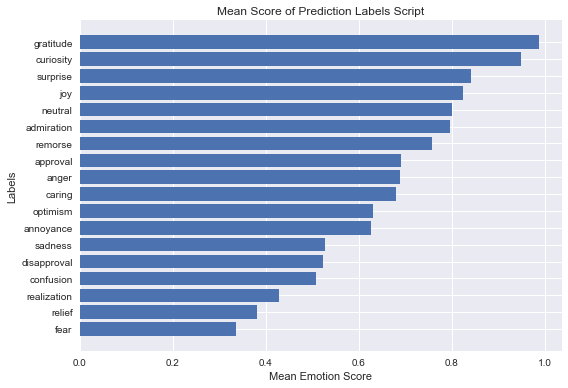

In [22]:
plt.barh(list(sorted_mean_dict_script.keys()), list(sorted_mean_dict_script.values()))
plt.title('Mean Score of Prediction Labels Script')
plt.xlabel('Mean Emotion Score')
plt.ylabel('Labels')
plt.tight_layout()
plt.savefig('../graphs/script_mean_preds.jpg')

In [23]:
frequencies_unique = []
for column in unique.columns:
    frequencies_unique.append(sum(unique[column].apply(lambda x: set_frequency(x))))

In [24]:
frequencies_unique

[5206,
 2967,
 1817,
 2334,
 7481,
 5218,
 4214,
 32777,
 1366,
 978,
 3265,
 257,
 76,
 1627,
 423,
 2624,
 2,
 1398,
 1981,
 69,
 2199,
 30,
 1060,
 109,
 2121,
 1291,
 967,
 105962]

In [27]:
freq_dict_unique = dict(zip(unique.columns, frequencies_unique))
sorted_freq_dict_unique = dict(sorted(freq_dict_unique.items(), key=lambda item: item[1]))

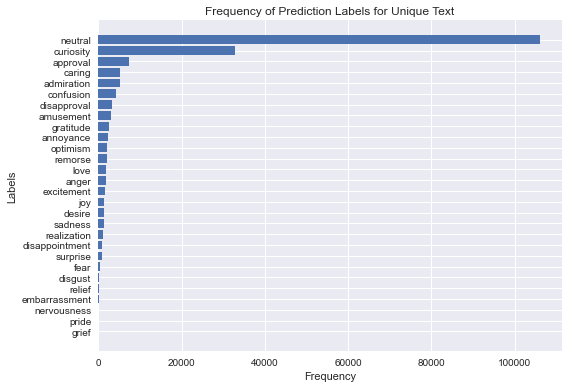

In [28]:
plt.barh(list(sorted_freq_dict_unique.keys()), list(sorted_freq_dict_unique.values()))
plt.title('Frequency of Prediction Labels for Unique Text')
plt.xlabel('Frequency')
plt.ylabel('Labels')
plt.tight_layout()
plt.savefig('../graphs/unique_freq_preds.jpg')

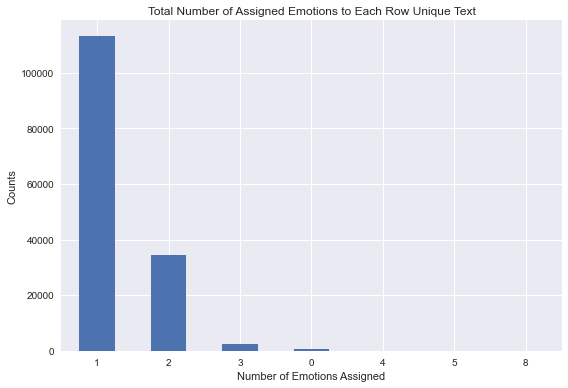

In [29]:
unique.astype(bool).sum(axis=1).value_counts().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=360)
plt.title('Total Number of Assigned Emotions to Each Row Unique Text')
plt.xlabel('Number of Emotions Assigned')
plt.ylabel('Counts')
plt.tight_layout()
plt.savefig('../graphs/unique_total_preds.jpg')

In [30]:
labels = unique.columns
mean_scores_unique = []
for label in labels:
    mean_scores_unique.append(unique.loc[unique[label] > 0, label].mean())

In [31]:
mean_scores_unique

[0.8376124836633263,
 0.900906782078751,
 0.7760441246666486,
 0.7172143327418615,
 0.7215845547860485,
 0.7064707055202432,
 0.638801843196677,
 0.7875111825189309,
 0.7200317673417869,
 0.65114647948425,
 0.7854711976661068,
 0.6934256029500108,
 0.7248021128930544,
 0.6392472963356576,
 0.7955953317471993,
 0.9301650170577553,
 0.39634984731674194,
 0.7048152813072368,
 0.8089054539039964,
 0.6729758213395658,
 0.7509055409094267,
 0.4961453129847844,
 0.6698785954488898,
 0.5037042178692074,
 0.8030206167658563,
 0.6996349523364805,
 0.7334673666658175,
 0.9135361836343513]

In [32]:
# Sorting the frequencies in increasing order
mean_dict_unique = dict(zip(labels, mean_scores_unique))
del mean_dict_unique['grief']
sorted_mean_dict_unique = dict(sorted(mean_dict_unique.items(), key=lambda item: item[1]))

In [33]:
sorted_mean_dict_unique

{'pride': 0.4961453129847844,
 'relief': 0.5037042178692074,
 'confusion': 0.638801843196677,
 'excitement': 0.6392472963356576,
 'disappointment': 0.65114647948425,
 'realization': 0.6698785954488898,
 'nervousness': 0.6729758213395658,
 'disgust': 0.6934256029500108,
 'sadness': 0.6996349523364805,
 'joy': 0.7048152813072368,
 'caring': 0.7064707055202432,
 'annoyance': 0.7172143327418615,
 'desire': 0.7200317673417869,
 'approval': 0.7215845547860485,
 'embarrassment': 0.7248021128930544,
 'surprise': 0.7334673666658175,
 'optimism': 0.7509055409094267,
 'anger': 0.7760441246666486,
 'disapproval': 0.7854711976661068,
 'curiosity': 0.7875111825189309,
 'fear': 0.7955953317471993,
 'remorse': 0.8030206167658563,
 'love': 0.8089054539039964,
 'admiration': 0.8376124836633263,
 'amusement': 0.900906782078751,
 'neutral': 0.9135361836343513,
 'gratitude': 0.9301650170577553}

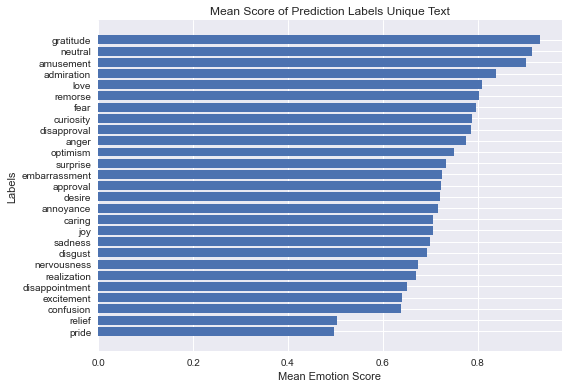

In [34]:
plt.barh(list(sorted_mean_dict_unique.keys()), list(sorted_mean_dict_unique.values()))
plt.title('Mean Score of Prediction Labels Unique Text')
plt.xlabel('Mean Emotion Score')
plt.ylabel('Labels')
plt.tight_layout()
plt.savefig('../graphs/unique_mean_preds.jpg')